## EOSC 453 - Assignment 1 
Claire Parrott, Vanessa Yau

Code Algorithim: 
1. import everything, initialize variables
2. find k values from steady state solution given initial flux conditions
3. use k values to plot timeseries when adding a source (emissions)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sci
from Initialize import * ## contains initial values
from Functions import * ## imports all functions stored in a .py file

## in Initialize.py ask if the net flux values initally given sum to 0 to ensure a steady state solution

4 Box Net flux is 0
9 Box Net flux is 0


Thinking if we use the same code to plot everything we can keep it clean by creating functions to do this

## 4 box model results, CO2 in air and ocean with 2 integration methods, RK4 and odeint

In [2]:
## Solving the coupled ODEs with and without forcing, with RK4 method and ODEint
t = (1800, 2200) # want 1800-2200 time interval
t_start = 1500; t_end= 2200; n = 1000
time_step = 1e-2 # TODO figure out if max_step is needed
Mforced = sci.solve_ivp(MassFlux, t, M0_4, method="RK45", vectorized = True, args=(1,1))
Msteady = sci.solve_ivp(MassFlux, t, M0_4, method="RK45", vectorized = True, args=(0,0))


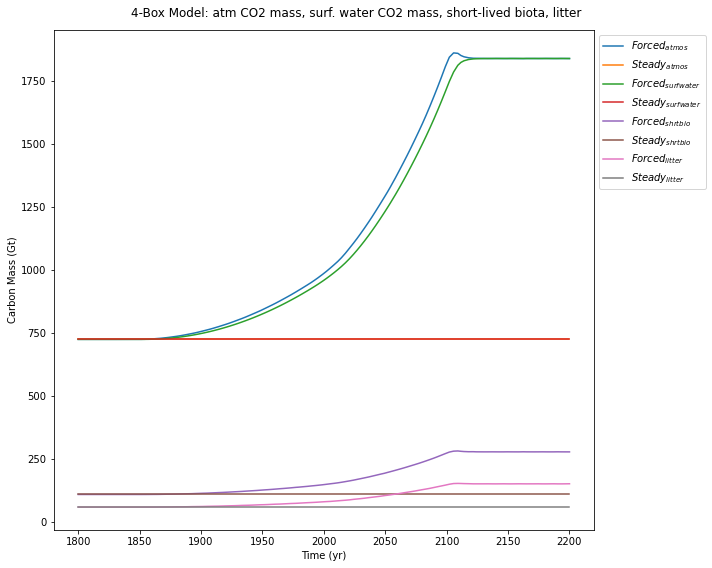

In [3]:
## PLOTTING
plt.figure(figsize = [10, 8])
plt.suptitle('4-Box Model: atm CO2 mass, surf. water CO2 mass, short-lived biota, litter')

for i in range(1, 5):
    box_num = i-1
    plt.plot(Mforced.t, Mforced.y[box_num, :])
    plt.plot(Msteady.t, Msteady.y[box_num, :])
    plt.ylabel("Carbon Mass (Gt)")

plt.xlabel('Time (yr)')
plt.legend(('$Forced_{atmos}$', '$Steady_{atmos}$', '$Forced_{surfwater}$', '$Steady_{surfwater}$', '$Forced_{shrtbio}$', '$Steady_{shrtbio}$', '$Forced_{litter}$', 
                '$Steady_{litter}$'), bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()
plt.savefig('4box.png')
plt.show()

4 box model with 0 emissions at 2110. Emissions cause inc in CO2 in both boxes but once stopped a new steady state is reached. This makes sense (math) because only emissions were added, need more sinks/added sinking mechanism to draw out CO2 from atmosphere. 

## 9 Box Model 
Use RK45, RK23 and DOP853 methods of integration and compare

In [4]:
## Question 1: plot box 1 and 2 using odeint
#del Mforced, Msteady, Mrk_real, Mrkss_real 
t = (1800, 2200) # want 1800-2200 time interval
t_start = 1500; t_end= 2200; n = 1000
#t = np.linspace(t_start, t_end, n) # some time span
## Solving the coupled ODEs with and without forcing, with RK4 method and ODEint
Mforced = sci.solve_ivp(MassFlux, t, M0_9, method="RK45", vectorized = True, args=(1, 1))
Msteady = sci.solve_ivp(MassFlux, t, M0_9, method="RK45", vectorized = True, args=(0, 0))


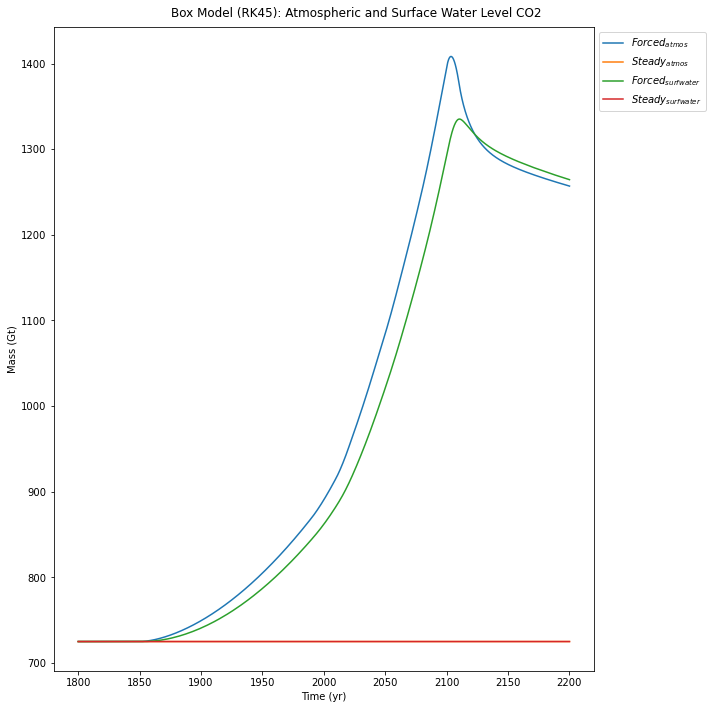

In [5]:
## PLOTTING
plt.figure(figsize = [10, 10])
plt.suptitle('Box Model (RK45): Atmospheric and Surface Water Level CO2')

for i in range(1, 3):
    box_num = i-1
    plt.plot(Mforced.t, Mforced.y[box_num, :])
    plt.plot(Msteady.t, Msteady.y[box_num, :])

plt.xlabel('Time (yr)')
plt.ylabel("Mass (Gt)")
plt.legend(('$Forced_{atmos}$', '$Steady_{atmos}$', '$Forced_{surfwater}$', '$Steady_{surfwater}$'), bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()
plt.savefig("9box_q1.png")
plt.show()


In [6]:
## Different ODE methods using the emissions forcing 
t = (1800, 2200) # T-span
time_step = 1e-2

## Solving the coupled ODEs with different ODE methods using the emissions forcing
MRK45 = sci.solve_ivp(MassFlux, t, M0_9, method="RK45", vectorized = True, max_step = time_step, args=(1, 1))
MRK23 = sci.solve_ivp(MassFlux, t, M0_9, method="RK23", vectorized = True, max_step = time_step, args=(1, 1))
MDOP853 = sci.solve_ivp(MassFlux, t, M0_9, method="DOP853", vectorized = True,  max_step = time_step, args=(1, 1))


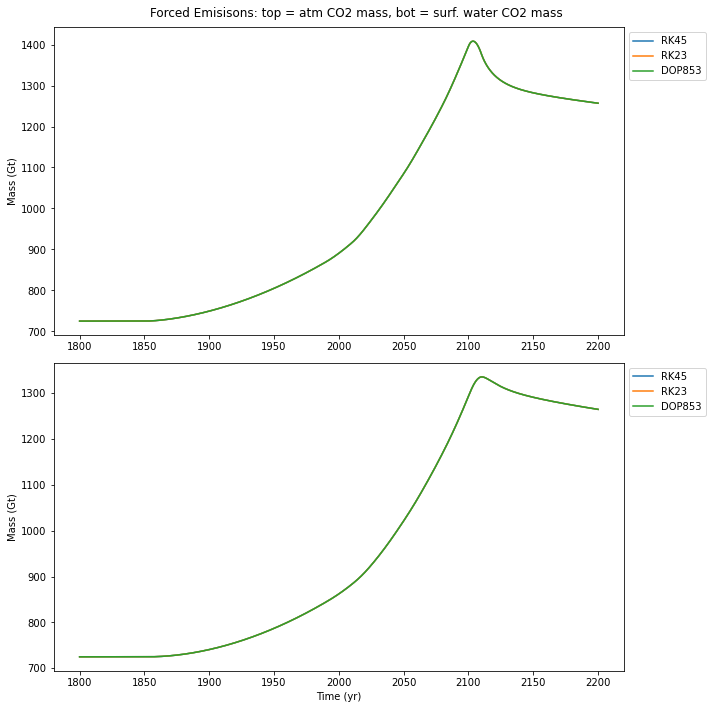

In [7]:
## PLOTTING
plt.figure(figsize = [10, 10])
plt.suptitle('Forced Emisisons: top = atm CO2 mass, bot = surf. water CO2 mass')

for i in range(1, 3):
    box_num = i-1
    plt.subplot(2,1,i)
    plt.plot(MRK45.t, MRK45.y[box_num, :])
    plt.plot(MRK23.t, MRK23.y[box_num, :])
    plt.plot(MDOP853.t, MDOP853.y[box_num, :])
    plt.legend(('RK45', 'RK23', 'DOP853'), bbox_to_anchor=(1,1), loc="upper left")
    plt.ylabel("Mass (Gt)")

plt.xlabel('Time (yr)')
plt.tight_layout()
plt.savefig("9box_q1_diffODEmethods.png")
plt.show()

In [8]:
## Question 2: modify emissions to maintain 2000AD value indefinetly, plot box 1 and 2
Mforced = sci.solve_ivp(MassFlux, t, M0_9, method="RK45", vectorized = True, args=(2, 2)) ## t first bc Mass flux function needs t first for rk4 func.
Msteady = sci.solve_ivp(MassFlux, t, M0_9, method="RK45", vectorized = True, args=(0, 0))

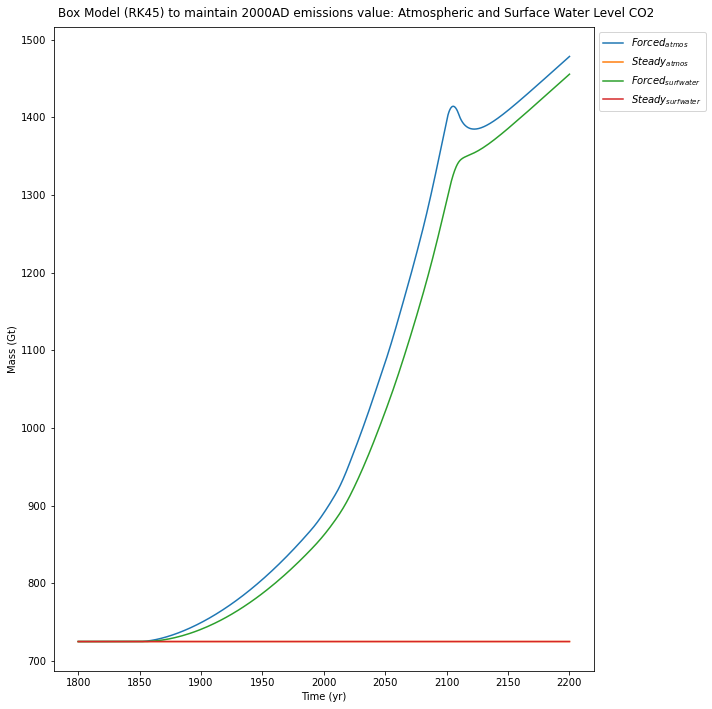

In [9]:
## PLOTTING
plt.figure(figsize = [10, 10])
plt.suptitle('Box Model (RK45) to maintain 2000AD emissions value: Atmospheric and Surface Water Level CO2')

for i in range(1, 3):
    box_num = i-1
    plt.plot(Mforced.t, Mforced.y[box_num, :])
    plt.plot(Msteady.t, Msteady.y[box_num, :])

plt.xlabel('Time (yr)')
plt.ylabel("Mass (Gt)")
plt.legend(('$Forced_{atmos}$', '$Steady_{atmos}$', '$Forced_{surfwater}$', '$Steady_{surfwater}$'), bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()
plt.savefig('9boxmodel_q2.png')
plt.show()

In [10]:
## Question 3: modify emissions to investigate periodic and decaying periodic CO2 forcing
#removing max_step from 2nd last argument for now
Mforced_sin = sci.solve_ivp(MassFlux, t, M0_9, method="RK45", vectorized = True, args=(3, 3))
Mforced_cos = sci.solve_ivp(MassFlux, t, M0_9, method="RK45", vectorized = True, args=(6, 6))
Mforced_decay = sci.solve_ivp(MassFlux, t, M0_9, method="RK45", vectorized = True, max_step = 1e-2, args=(4, 4))
Msteady = sci.solve_ivp(MassFlux, t, M0_9, method="RK45", vectorized = True, args=(0, 0))

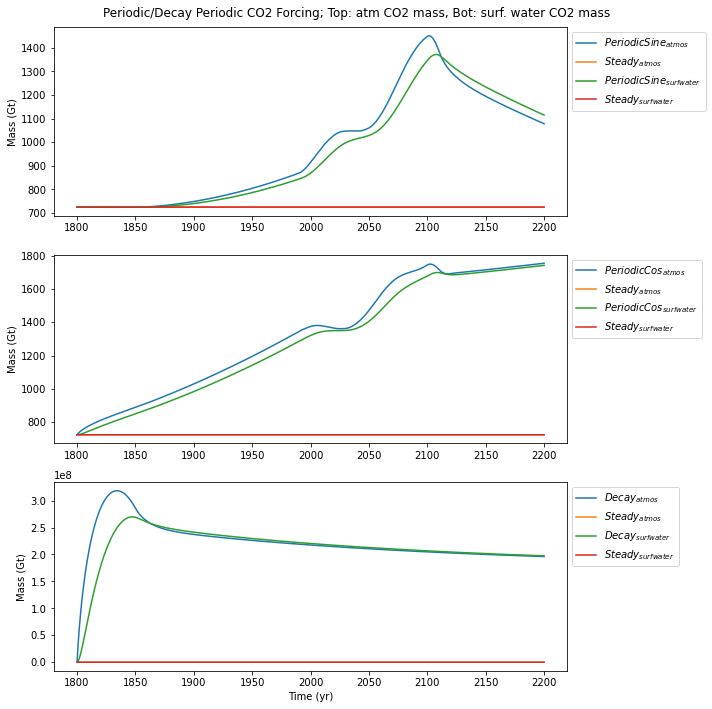

In [11]:
## PLOTTING
plt.figure(figsize = [10, 10])
plt.suptitle('Periodic/Decay Periodic CO2 Forcing; Top: atm CO2 mass, Bot: surf. water CO2 mass')

plt.subplot(3,1,1)
for i in range(1, 3):
    box_num = i-1
    plt.plot(Mforced_sin.t, Mforced_sin.y[box_num, :])
    plt.plot(Msteady.t, Msteady.y[box_num, :])

plt.ylabel("Mass (Gt)")
plt.legend(('$PeriodicSine_{atmos}$', '$Steady_{atmos}$', '$PeriodicSine_{surfwater}$', '$Steady_{surfwater}$'), bbox_to_anchor=(1,1), loc="upper left")

plt.subplot(3,1,2)
for i in range(1, 3):
    box_num = i-1
    plt.plot(Mforced_cos.t, Mforced_cos.y[box_num, :])
    plt.plot(Msteady.t, Msteady.y[box_num, :])

plt.ylabel("Mass (Gt)")
plt.legend(('$PeriodicCos_{atmos}$', '$Steady_{atmos}$', '$PeriodicCos_{surfwater}$', '$Steady_{surfwater}$'), bbox_to_anchor=(1,1), loc="upper left")

plt.subplot(3,1,3)
for i in range(1, 3):
    box_num = i-1
    plt.plot(Mforced_decay.t, Mforced_decay.y[box_num, :])
    plt.plot(Msteady.t, Msteady.y[box_num, :])

plt.ylabel("Mass (Gt)")
plt.legend(('$Decay_{atmos}$', '$Steady_{atmos}$', '$Decay_{surfwater}$', '$Steady_{surfwater}$'), bbox_to_anchor=(1,1), loc="upper left")

plt.xlabel('Time (yr)')
plt.tight_layout()
plt.savefig('9boxmodel_q3.png')
plt.show()

In [12]:
## Question 4: try other emissions scenarios and/or different flux laws
# IPCC B1 emissions scenario
Mforced_A1T = sci.solve_ivp(MassFlux, t, M0_9, method="RK45", vectorized = True, args=(5, 5))
Mforced_A1FI = sci.solve_ivp(MassFlux, t, M0_9, method="RK45", vectorized = True, args=(7, 7))
Mforced_A2 = sci.solve_ivp(MassFlux, t, M0_9, method="RK45", vectorized = True, args=(1, 1))

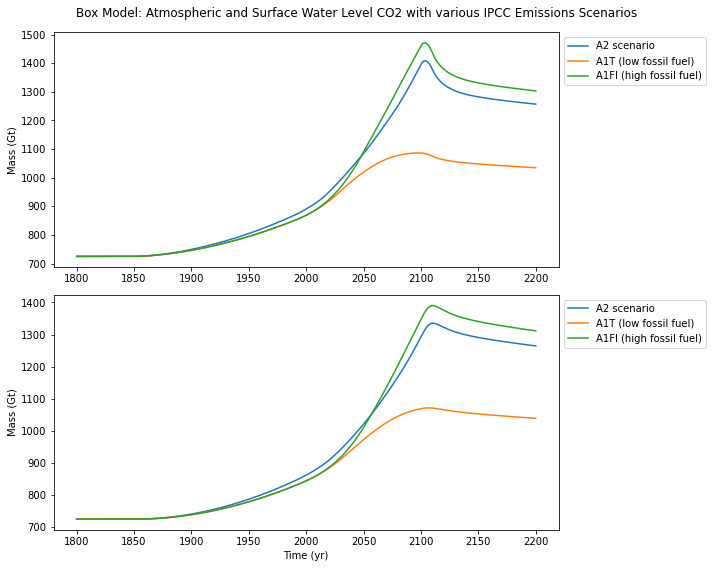

In [13]:
## PLOTTING
plt.figure(figsize = [10, 8])
plt.suptitle('Box Model: Atmospheric and Surface Water Level CO2 with various IPCC Emissions Scenarios')

for i in range(1, 3):
    box_num = i-1
    plt.subplot(2,1,i)
    plt.plot(Mforced_A2.t, Mforced_A2.y[box_num, :], label = 'A2 scenario')
    plt.plot(Mforced_A1T.t, Mforced_A1T.y[box_num, :], label = 'A1T (low fossil fuel)')
    plt.plot(Mforced_A1FI.t, Mforced_A1FI.y[box_num, :], label = 'A1FI (high fossil fuel)')

    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    plt.ylabel("Mass (Gt)")

plt.xlabel('Time (yr)')
plt.tight_layout()
plt.savefig('9boxmodel_q4.png')
plt.show()